In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

sb.set()

In [50]:
data = pd.read_csv("house_sales.csv")

In [51]:
clean_data = data.copy(deep = True)

In [52]:
def clean(s):
    c = s.split("T")
    c = c[0]
    c = c[:4] + "-" + c[4:6] + "-" + c[6:]
    return pd.Timestamp(c)

In [44]:
def getDate(s):
    c = s[:4] + "-" + s[4:6] + "-" + s[6:]
    return c

In [53]:
# Either or both works
clean_data['date'] = pd.Series(map(clean, clean_data['date']))
# clean_data['date'] = pd.Series(map(getDate, clean_data['date']))

In [54]:
clean_data['date'] = pd.Series(map(pd.Timestamp, clean_data['date']))

In [55]:
clean_data['age'] = 2020 - clean_data[['yr_built', 'yr_renovated']].max(axis = 1)

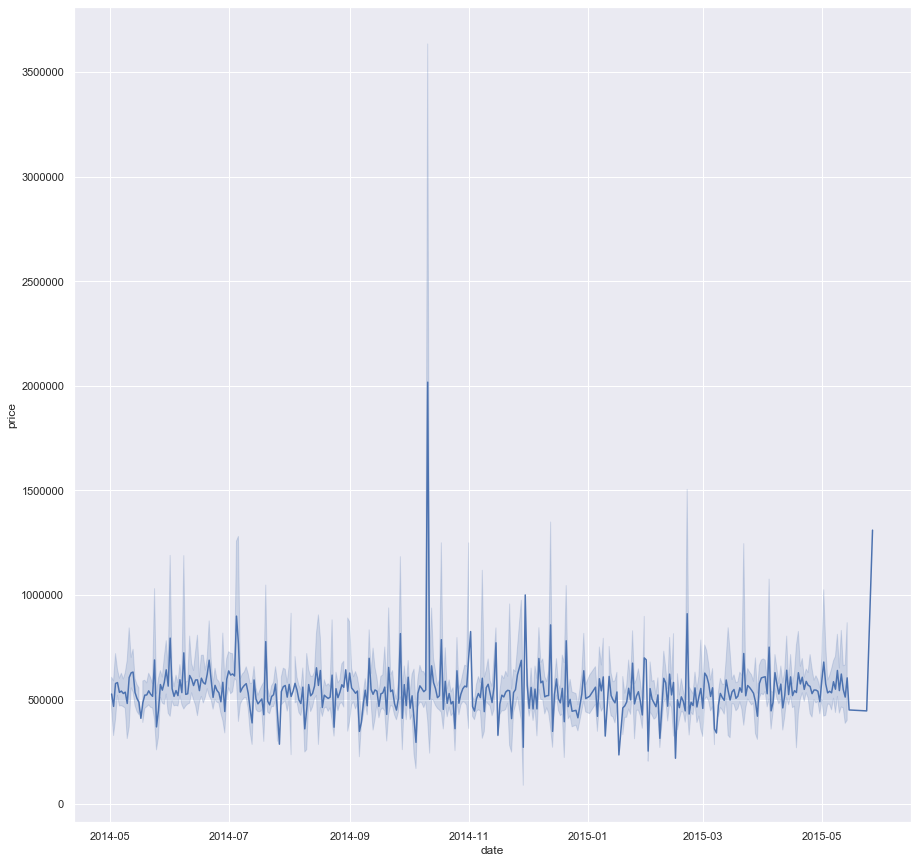

In [56]:
f, axes = plt.subplots(figsize = (15,15))

sb.lineplot(x = 'date', y = 'price', data = clean_data, ax = axes)

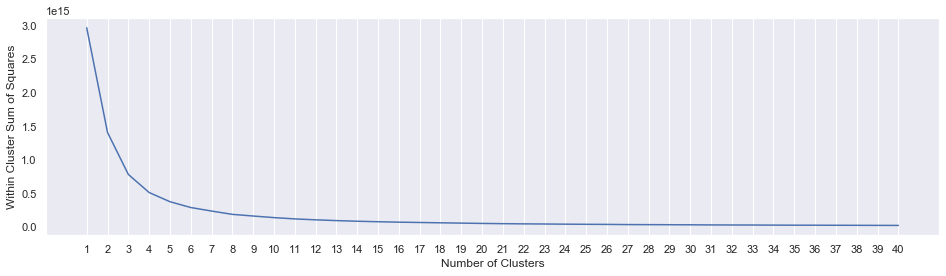

In [27]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Do clustering based on these variables (except id)
clustering_variables = ["price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "sqft_living15", "sqft_lot15", "age"]
clustering_data = pd.DataFrame(clean_data[clustering_variables])
clustering_data.head()

temp_clustering = clustering_data
ids = pd.DataFrame(clustering_data.iloc[:, 0])

# Vary the Number of Clusters
min_clust = 1
max_clust = 40
init_algo = 'k-means++'

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 5)
    kmeans.fit(temp_clustering)
    within_ss.append(kmeans.inertia_)

# Angle Plot : Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

In [28]:
# Set "optimal" Clustering Parameters obtained from R script
num_clust = 3
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust,         
               init = init_algo,
               n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(temp_clustering)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Features 	Price 	Fees 	Accom. 	WCs 	Rooms 	Beds

Cluster 0:	374971.43	3.19	1.9	1737.7	12770.35	1.41	1513.85	223.84	1970.34	58.6	1749.5	11348.8	48.11	
Cluster 1:	2030683.32	4.18	3.47	4332.66	28454.17	1.86	3541.73	790.94	1975.11	287.83	3269.82	20736.98	37.42	
Cluster 2:	809446.66	3.74	2.52	2723.6	19710.18	1.67	2310.32	413.28	1972.29	129.51	2460.78	15579.62	43.74	

Within Cluster Sum of Squares : 783163126729695.2



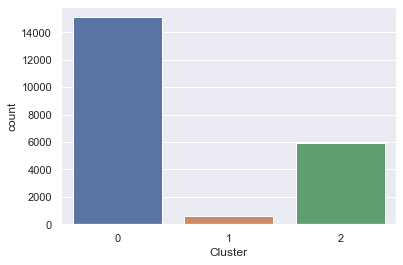

In [29]:
# Print the Cluster Centers
print("Features", "\tPrice", "\tFees", "\tAccom.", "\tWCs", "\tRooms", "\tBeds")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(temp_clustering)

# Append Labels to the Data
X_labeled = temp_clustering.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(X_labeled["Cluster"])

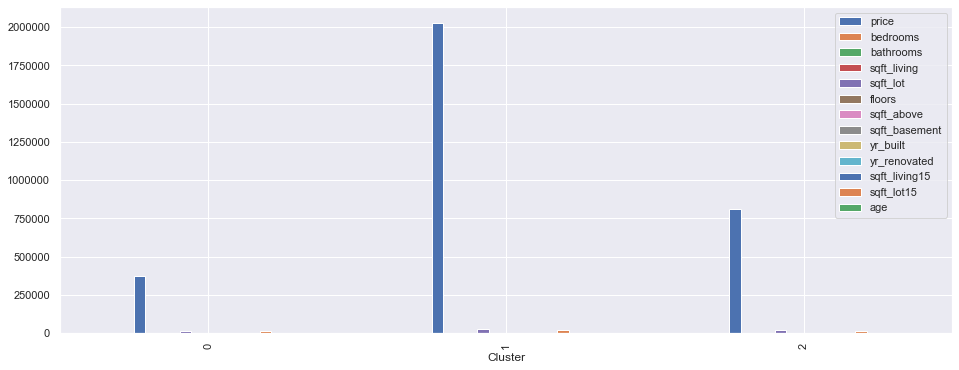

In [30]:
cluster_data = pd.DataFrame(X_labeled.groupby(by = "Cluster").mean())
cluster_data.plot.bar(figsize = (16,6))

In [33]:
clean_data['Cluster'] = X_labeled['Cluster']

In [34]:
clean_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,Cluster
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,65,0
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,29,0
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,87,0
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,55,2
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000,3,2.50,1530,1131,3.0,0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,11,0
21609,6600060120,2015-02-23,400000,4,2.50,2310,5813,2.0,0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,6,0
21610,1523300141,2014-06-23,402101,2,0.75,1020,1350,2.0,0,0,...,0,2009,0,98144,47.5944,-122.299,1020,2007,11,0
21611,291310100,2015-01-16,400000,3,2.50,1600,2388,2.0,0,0,...,0,2004,0,98027,47.5345,-122.069,1410,1287,16,0


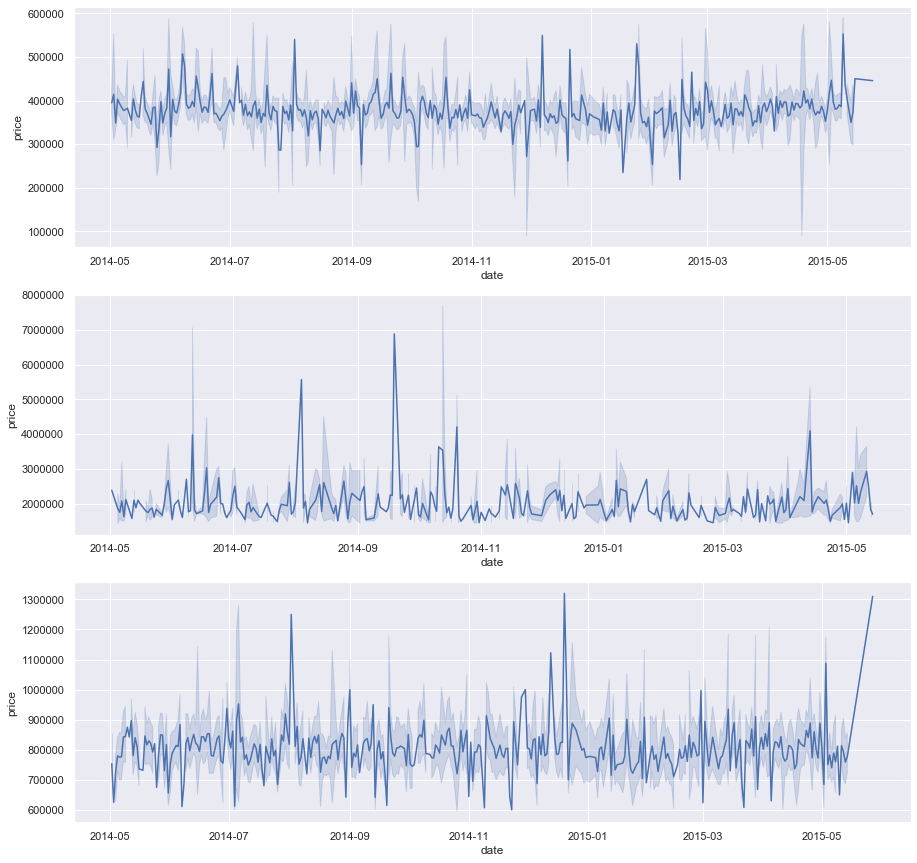

In [36]:
f, axes = plt.subplots(3,1,figsize = (15,15))

for i in range(3):
    temp_data = clean_data[clean_data["Cluster"] == i]
    sb.lineplot(x = 'date', y = 'price', data = temp_data, ax = axes[i])

In [39]:
f.savefig("historical_housing_trend.png")